In [2]:
import torch

def my_pytorch_function(input_data):
  if not torch.is_tensor(input_data):
    raise TypeError("Input must be a PyTorch tensor.")

  result = torch.sum(input_data)
  return result

tensor_data = torch.tensor([1, 2, 3])
list_data = [1, 2, 3]

print(my_pytorch_function(tensor_data))  # Output: 6

try:
    print(my_pytorch_function(list_data))
except TypeError as e:
    print(e)

tensor(6)
Input must be a PyTorch tensor.


is_tensor is to check whether a given variable or object is a tensor or not

### is_floating_point:
Crucial when you need to determine if a tensor holds floating-point numbers (float64, float32, float16, bfloat16). 
This is very common in numerical computations and when dealing with model parameters or data that requires decimal 
precision.

In [5]:
tensor = torch.randn(2, 3, 4) 

if tensor.is_floating_point():
    print(f"The tensor is floating-point and has {tensor.numel()} elements.")

The tensor is floating-point and has 24 elements.


### numel: 
Returns the total number of elements in a tensor. You'll use this frequently for:
* Calculating memory usage.
* Reshaping or flattening tensors.
* Iterating through all elements.
* Understanding the size of model parameters.

### set_default_device:
Sets default device to allocate your tensor, CPU or CUDA devices.

### get_default_device:
Get the current default allocated device.
torch.set_default_device('cuda')

In [6]:
print(torch.get_default_device())

cpu


# common methods

In [7]:
import torch
import numpy as np

my_list = [1, 2, 3]
my_array = np.array([[4, 5], [6, 7]])
# converting python list to tensor.
tensor_from_list = torch.tensor(my_list)
# converting Numpy array to tensor.
tensor_from_array = torch.tensor(my_array)
print(tensor_from_list)
print(tensor_from_array)

tensor([1, 2, 3])
tensor([[4, 5],
        [6, 7]])


In [8]:

# torch.as_tensor -> Converts data into a tensor
import torch
import numpy as np

numpy_array = np.array([1., 2., 3.])  # Note: Use floating-point for autograd
tensor_from_numpy = torch.as_tensor(numpy_array)

tensor_from_numpy[0] = 5.

# The change is reflected in the original NumPy array as well!
print(numpy_array)  # Output: [5. 2. 3.]

# Example with autograd:
tensor_from_numpy.requires_grad_(True) # tell the tensor to track gradient
y = tensor_from_numpy.sum()
y.backward() # calculate gradient
print(tensor_from_numpy.grad)

[5. 2. 3.]
tensor([1., 1., 1.], dtype=torch.float64)


In [9]:
# torch.from_numpy -> Creates a tensor that shares memory with a NumPy array. it is similar to as_tensor, but it does not preseve autograd history.

numpy_arr = np.array([1,23,4])
tensor_from_numpy = torch.from_numpy(numpy_arr)
tensor_from_numpy[0]=24
print(numpy_arr)


[24 23  4]


In [12]:
# torch.zeros(shape) -> Creates a tensor of a specified shape filled with zeros.
zeros_tensor = torch.zeros(3,2)
zeros_tensor
ones = torch.ones(2,2,1)
ones

tensor([[[1.],
         [1.]],

        [[1.],
         [1.]]])

In [14]:
# torch.arrage -> Creates a 1D tensor with values in a specified range and step size (similar to NumPy's arange).
seq = torch.arange(0,10,2)
print(seq)
# torch.linspace  -> Creates a 1D tensor with evenly spaced numbers over a specified interval.
linear_tensor = torch.linspace(0,1,5)


tensor([0, 2, 4, 6, 8])


In [15]:
# torch.zeros_like and torch.ones_like -> Create tensors filled with zeros or ones, respectively, with the same shape and data type as another existing tensor.
import torch

input_tensor = torch.randn(2, 5)  # Some tensor with a specific shape

zeros_like_input = torch.zeros_like(input_tensor)
ones_like_input = torch.ones_like(input_tensor)

print(zeros_like_input)
print(ones_like_input)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [16]:
# torch.empty -> creates a tensor without initializing its values. The tensor will contain garbage data that was present in memory at the time of allocatio
import torch
# Create an empty tensor
empty_tensor = torch.empty(2, 3)
print(empty_tensor) # print garbage value present in the memory

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [17]:
# torch.empty_like
import torch
existing_tensor = torch.randn(3, 4)
empty_like_tensor = torch.empty_like(existing_tensor)
print(empty_like_tensor)

tensor([[1.8365e+21, 7.0065e-45, 3.0829e-44, 0.0000e+00],
        [       nan, 4.1951e-08, 1.0899e+27, 6.8943e+34],
        [1.6212e-19, 3.0881e+29, 6.3828e+28, 1.7401e-18]])


In [18]:
# torch.cat() -> Concatenates (joins) a sequence of tensors along a specified dimension.
tensor1 = torch.randn(2,3)
tensor2 = torch.randn(2,3)
concatenated_tensor = torch.cat((tensor1,tensor2),dim=0)
print(concatenated_tensor)

tensor([[-0.6938,  0.3191,  0.8308],
        [-3.0425, -0.9532,  1.2981],
        [ 0.6710,  1.8418,  2.0649],
        [-0.1719,  0.8289, -1.1376]])


In [20]:
# torch.stack -> concatenates a sequence of tensors along a new dimension
import torch

tensor1 = torch.randn(2, 3)
tensor2 = torch.randn(2, 3)

stacked_tensor = torch.stack((tensor1, tensor2), dim=0)  # Stack along a new 0th dimension
print(stacked_tensor.shape)  # Output: torch.Size([2, 2, 3])
stacked_tensor

torch.Size([2, 2, 3])


tensor([[[-2.0830, -0.8907,  1.6814],
         [ 0.8560, -0.6893, -0.7170]],

        [[-0.4292,  0.7553, -1.7111],
         [ 0.4065,  0.5403,  1.0753]]])

In [21]:
# torch.reshape()
import torch

tensor = torch.randn(2, 3, 4)
reshaped_tensor = tensor.reshape(6, 4)  # Reshape to 6x4
flattened_tensor = tensor.reshape(-1)   # Flatten to a 1D vector (size is inferred)
print(reshaped_tensor.shape)
print(flattened_tensor.shape)

torch.Size([6, 4])
torch.Size([24])


In [22]:
# torch.view() -> similar to reshape, it returns a new tensor with the same data but a different shape. The key difference is that view requires the new shape to be compatible with the number of elements and their contiguity in memory.
import torch
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [23]:
# torch.transpose -> swaps dimensions.
tensor = torch.randn(2, 3)
transposed_tensor = tensor.transpose(0, 1)  # Swap dimensions 0 and 1
print(transposed_tensor.shape)

torch.Size([3, 2])


In [25]:
# tensor.permute -> Rearrages the dimensions of a tensor.
tensor = torch.randn(2, 3, 4)  # Example: batch, channels, height, width
permuted_tensor = tensor.permute(0, 2, 3, 1)  # Rearrange to: batch, height, width, channels
print(permuted_tensor.shape)

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 3 is not equal to len(dims) = 4

In [27]:
# torch.unsqueeze -> adds a dimension of size one at a specified position.
tensor = torch.randn(3,4)
unsqueezed = tensor.unsqueeze(0)
print(unsqueezed.shape)
unsqueezed

torch.Size([1, 3, 4])


tensor([[[ 0.2764, -1.7679,  0.2431,  0.6934],
         [ 0.7735, -0.0447,  0.2097, -0.8425],
         [ 0.3524, -0.6992, -0.3864, -1.3037]]])

In [28]:
tensor = torch.randn(1,3,1,4)
tensor

tensor([[[[-0.1014,  1.8498,  0.5355, -0.3862]],

         [[ 0.4543, -1.2691,  0.3847, -0.7270]],

         [[-1.6231,  1.0825,  0.7761,  1.3699]]]])

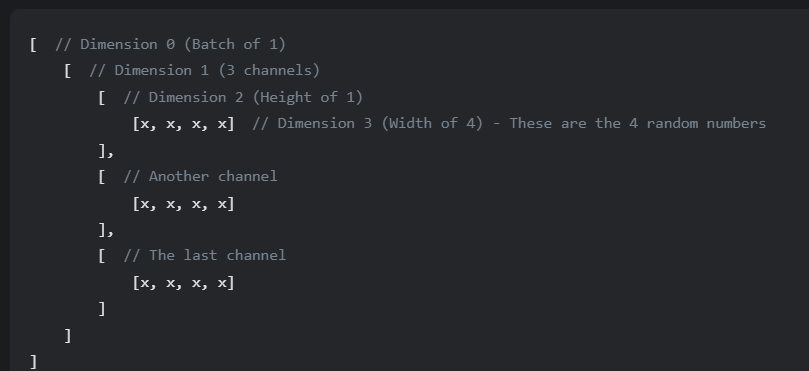

In [30]:
import torch

tensor = torch.randn(1, 3, 1, 4)
squeezed_tensor = tensor.squeeze()  # Remove all dimensions of size 1
print(squeezed_tensor.shape)  # Output: torch.Size([3, 4])

specific_squeeze = tensor.squeeze(2)  # Remove only the dimension at index 2
print(specific_squeeze.shape)  # Output: torch.Size([1, 3, 4])

torch.Size([3, 4])
torch.Size([1, 3, 4])


In [31]:
# torch.where() -> Returns elements chosen from either one of two tensors depending on a condition (like a ternary operator).
import torch

tensor = torch.randn(4)
condition = tensor > 0

result = torch.where(condition, tensor, torch.tensor(0.))  # If condition is true, take from tensor, else 0.
print(result)

tensor([0.5216, 0.0000, 0.0000, 1.8177])


In [32]:
# torch.masked_selec -> Selects elements from a tensor based on a boolean mask (a tensor of True/False values).
tensor = torch.randn(3, 4)
mask = tensor > 0  # Create a boolean mask

selected_elements = tensor.masked_select(mask)
print(selected_elements)

tensor([1.1971, 0.3127, 0.7607, 0.8415, 1.3623, 0.2756, 1.0400])


In [33]:
import torch
# Example: Assume you have a batch of 3 items and each item has 5 classes
# and you want to select the probability corresponding to the correct class for each item.
probabilities = torch.randn(3, 5).softmax(dim=1)  # Softmax to get probabilities
print(probabilities)

# Assume the correct classes for the 3 items are class 2, class 0, and class 4
correct_classes = torch.tensor([2, 0, 4])

# Use gather to select the probabilities of the correct classes
# The correct_classes tensor is expanded to be compatible with the probabilities tensor
selected_probabilities = probabilities.gather(1, correct_classes.unsqueeze(1))

print(selected_probabilities)

tensor([[0.6726, 0.0519, 0.0800, 0.0792, 0.1162],
        [0.0916, 0.1182, 0.0534, 0.3994, 0.3374],
        [0.0933, 0.1492, 0.1352, 0.2804, 0.3419]])
tensor([[0.0800],
        [0.0916],
        [0.3419]])
